# Analysis and Modeling of Income Dataset

By: Nishtha Shah

Following is the analysis and classification modelling of the Adult Census Income Dataset (taken from the Azure ML Sample Datasets) to be able to predict the income category

In [79]:
%matplotlib inline
import pandas as pd
import numpy as np
df = pd.read_csv("Adult Income DS.csv",skipinitialspace=True)
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [80]:
str(df.shape)

'(32561, 15)'

In [87]:
def clean_missingval(df,cols):
    #Assign all missing values in the form of '?' as NaN
    for column in cols:
        df.loc[df[column] == '?', column] = np.nan
    #Remove Missing values from the cols
    df.dropna(axis = 0, inplace = True)
    print('dimensions = ' + str(df.shape))
    return df
cols = ['workclass','occupation','native-country']
df = clean_missingval(df,cols)

dimensions = (30162, 15)


We have removed all missing values from the data that may cause error in modelling

In [89]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We can observe that capital-gain, capital-loss and fnlwgt are not uniformly distributed.

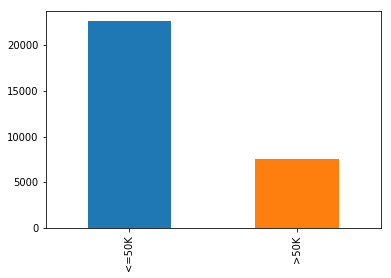

In [93]:
df['income'].value_counts().plot(kind='bar')

Note that the number of people in the <=50K categoryare almost 3 times those in the >50K category

'Done'

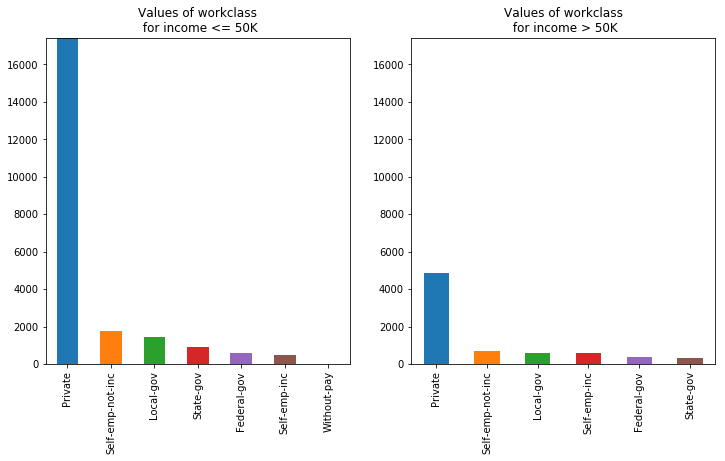

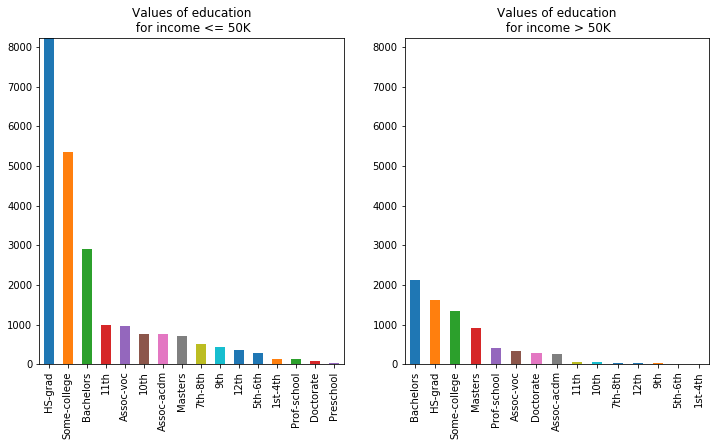

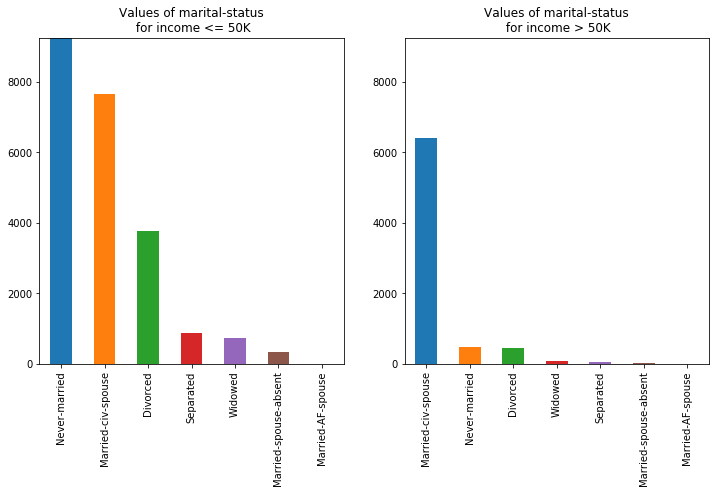

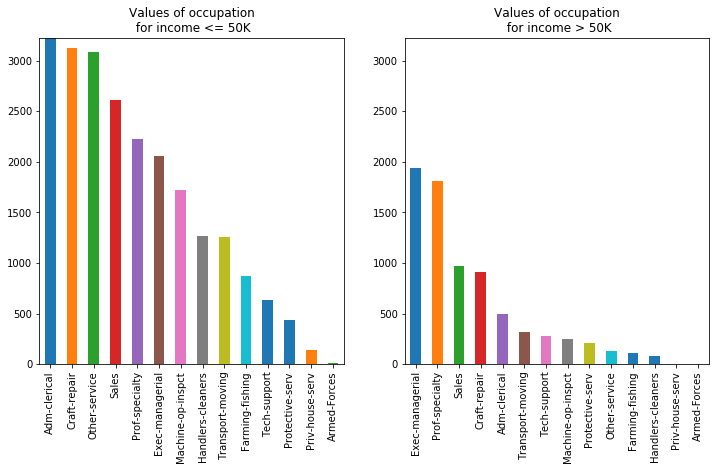

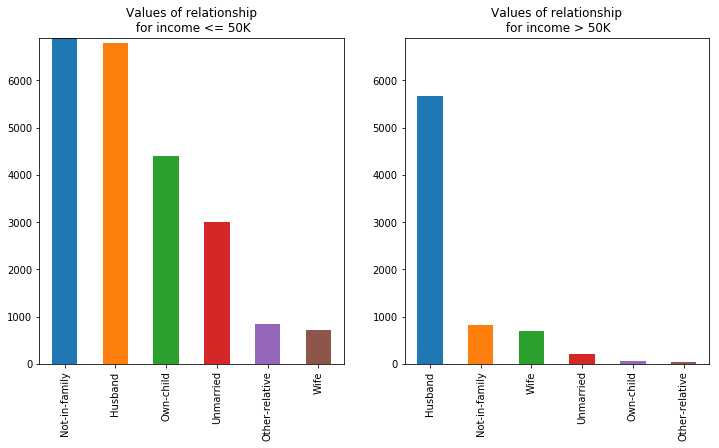

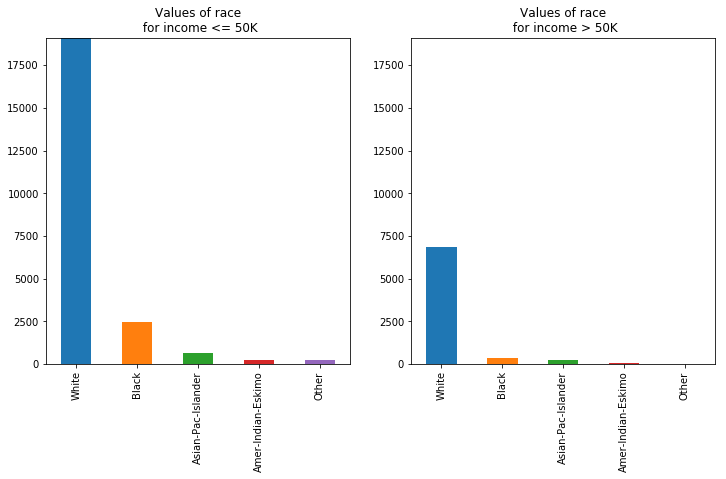

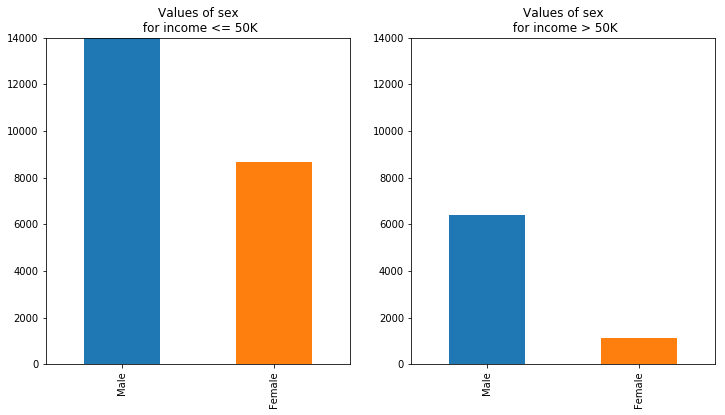

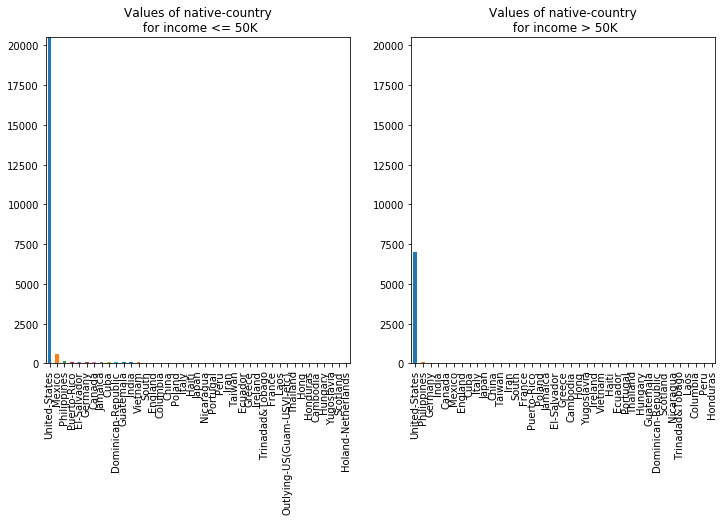

In [90]:
def income_barplot(df):
    import matplotlib.pyplot as plt
    
    cols = df.columns.tolist()[:-1]
    for col in cols:
        if(df.loc[:, col].dtype not in [np.int64, np.int32, np.float64]):
            temp1 = df.loc[df['income'] == '<=50K', col].value_counts()
            temp0 = df.loc[df['income'] == '>50K', col].value_counts() 
            
            ylim = [0, max(max(temp1), max(temp0))]
            fig = plt.figure(figsize = (12,6))
            fig.clf()
            ax1 = fig.add_subplot(1, 2, 1)
            ax0 = fig.add_subplot(1, 2, 2) 
            temp1.plot(kind = 'bar', ax = ax1, ylim=ylim)
            ax1.set_title('Values of ' + col + '\n for income <= 50K')
            temp0.plot(kind = 'bar', ax = ax0, ylim=ylim)
            ax0.set_title('Values of ' + col + '\n for income > 50K')
    return('Done')        

income_barplot(df)

We can see that marital-status may have some power in predicting the label category. The proportions of cases are quite different for people with income <=50K and people with income >50K. Husband dominates >50K, while Not-in-family is the largest fraction for <=50K.

Conversely, native-country may not be that useful in predicting the label category. First, there are quite a few categories. Second, the only category with significant numbers of people is United States. There is only a small fraction of the people spread over the other 41 countries. There is no particular pattern noticeable between people with income <=50K and people with income >50K.

'Done'

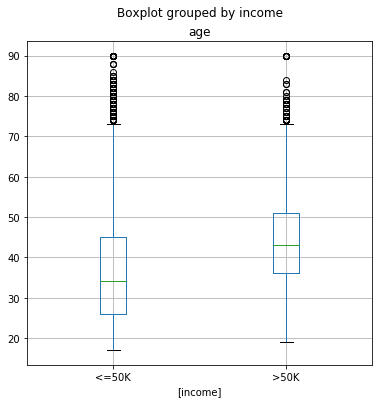

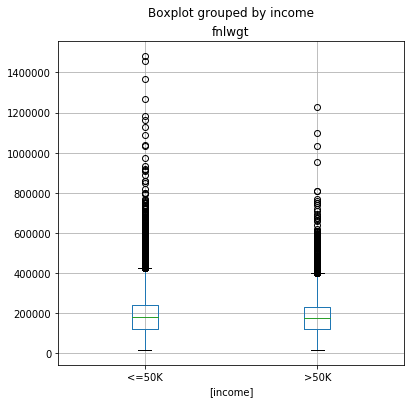

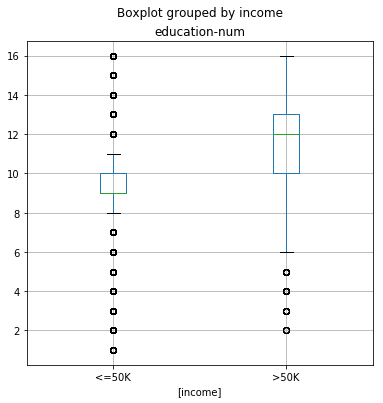

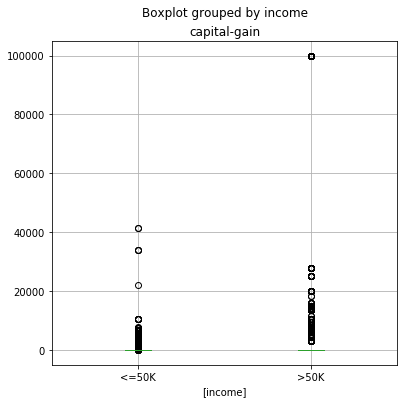

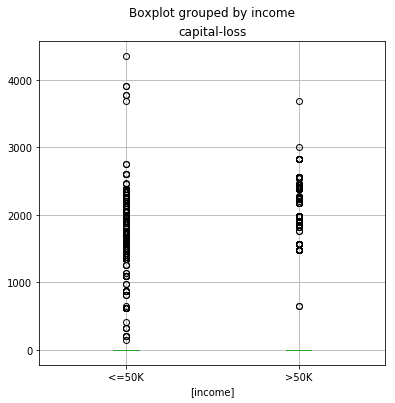

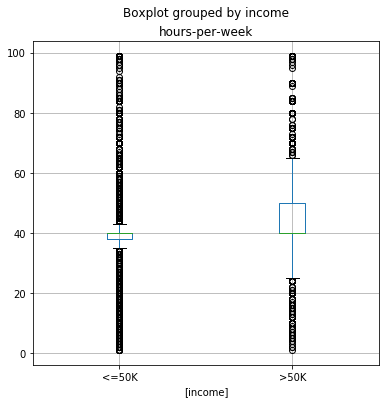

In [91]:
def income_boxplot(df):
    import matplotlib.pyplot as plt
    
    cols = df.columns.tolist()[:-1]
    for col in cols:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):                  
            fig = plt.figure(figsize = (6,6))
            fig.clf()
            ax = fig.gca() 
            df.boxplot(column = [col], ax = ax, by = ['income'])          
    return('Done') 

income_boxplot(df)

We can see that education-num may have some power in predicting the label category. People with income >50K tend to have consistently higher education-num values than people with income <=50K.

Conversely, capital-loss is not likely to be that useful in predicting the label category. Almost all people in the sample have 0 capital loss for both label values. The quartile markers in the box plot all fall on top of each other at 0.